In [4]:
import numpy as np
import pandas as pd

1) Загрузите данные по вариантам в ноутбук.

In [5]:
df = pd.read_excel('Вариант 2.xlsx', skiprows = 2, skipfooter = 1)
print(df.head(5))

   №  № школы Класс Пол  Номер варианта Задания с кратким ответом  \
0  1      124    11   Ж             341              ------+-----   
1  2      128    11   Ж             345              -+----------   
2  3      132    11   Ж             340              -+----------   
3  4      134    11   Ж             339              -+----------   
4  5      136    11   Ж             348              --------+---   

  Задания с развёрнутым ответом  Устная часть  Первичный балл  Балл  \
0  0(2)0(2)0(2)0(3)0(3)0(4)0(4)           NaN               1     5   
1  0(2)0(2)0(2)0(3)0(3)0(4)0(4)           NaN               1     5   
2  0(2)0(2)0(2)0(3)0(3)0(4)0(4)           NaN               1     5   
3  0(2)0(2)0(2)0(3)0(3)0(4)0(4)           NaN               1     5   
4  0(2)0(2)0(2)0(3)0(3)0(4)0(4)           NaN               1     5   

   Минимальный балл  
0                27  
1                27  
2                27  
3                27  
4                27  


2) Сделайте описательную статистику полученных данных.

In [6]:
df.describe()

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,0.0,2356.000000,2356.000000,2356.0
mean,1178.500000,132.005518,338.273769,NaN,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,NaN,3.820484,17.880420,0.0
min,1.000000,121.000000,101.000000,NaN,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,NaN,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,NaN,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,NaN,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,NaN,27.000000,96.000000,27.0


3) Найдите процент учащихся, выполнивших работу ниже среднего.

In [7]:
average_score = df['Балл'].mean()
average_score

49.25509337860781

In [8]:
below_average = df[df['Балл'] < average_score]
below_average.head(3)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27


In [9]:
percent_below_average = below_average.shape[0] / df.shape[0] *100 # .shape[0] - способ получить количество строк
print(f"Процент учащихся, выполнивших работу ниже среднего: {percent_below_average:.2f}%")

Процент учащихся, выполнивших работу ниже среднего: 48.01%


4) Найти процент учащихся не сдавших экзамен.

In [10]:
min_score = df['Минимальный балл']
not_passed = df[df['Балл'] < min_score]
not_passed.head(3)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27


In [11]:
percent_not_passed = not_passed.shape[0] / df.shape[0] * 100
print(f"Процент учащихся, не сдавших экзамен: {percent_not_passed:.2f}%")


Процент учащихся, не сдавших экзамен: 9.21%


5) Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

In [12]:
import matplotlib.pyplot as plt

In [13]:
passed_count = len(df[df['Балл'] >= min_score])
not_passed_count = len(df[df['Балл'] < min_score])


In [14]:
labels = ['Сдавшие', 'Не сдавшие']
data = [passed_count, not_passed_count]


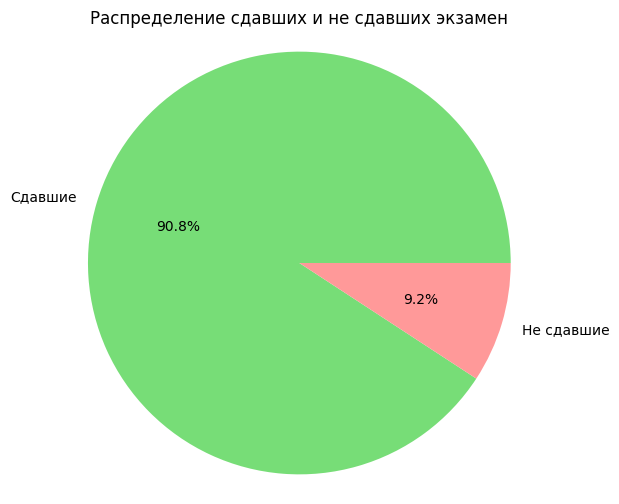

In [15]:
colors = ['#77dd77', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Распределение сдавших и не сдавших экзамен')
plt.show()

6) Постройте ядерную оценку плотности распределению баллов за экзамен.

In [16]:
import seaborn as sns

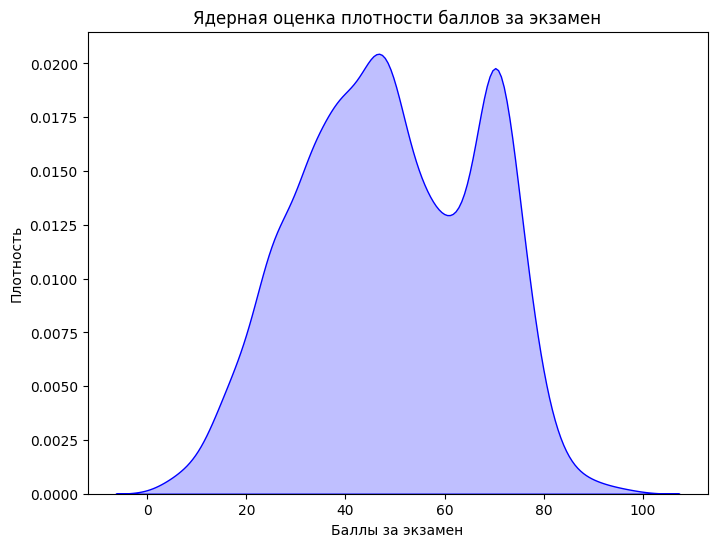

In [17]:
scores = df['Балл']

plt.figure(figsize=(8, 6))  # Устанавливаем размер графика (по желанию)
sns.kdeplot(scores, fill=True, color='blue' )
plt.xlabel('Баллы за экзамен')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности баллов за экзамен')
plt.show()

7) Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [18]:
def assign_grade(x):
    if x < 62:
        return 2
    elif x > 62 and x <77:
        return 3
    elif x > 77 and x < 91:
        return 4
    else:
        return 5

In [19]:
# df['Балл 5'] = df.loc[:,'Балл']
# df['Балл 5'] = df['Балл 5'].apply(replace_func)
# df.groupby(['Балл 5']).agg({'Балл 5': 'count'})
# df.groupby(['Балл 5']).agg({'Балл 5': 'count'}) / df.shape[0] * 100

In [20]:
df['Оценка'] = df['Балл'].apply(assign_grade)
grade_counts = df['Оценка'].value_counts()
df.groupby(['Оценка']).agg({'Оценка': 'count'}) / df.shape[0] * 100



,Оценка
Оценка,
2,67.062818
3,22.028862
4,3.353141
5,7.555178


In [21]:
df.head(3)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Оценка
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,2
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,2
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,2


8) Какое процентное соотношение юношей и девушек писало данный экзамен?

In [22]:
Men = df[df.loc[:, 'Пол'] == 'М'].count()
Women = df[df.loc[:, 'Пол'] == 'Ж'].count()

#per_men = Men[0] / df.shape[0] *100
#per_women = Women[0] / df.shape[0] *100

df.groupby(['Пол']).agg({'Пол': 'count'}) / df.shape[0] * 100

,Пол
Пол,
Ж,52.843803
М,47.156197


9) Сколько школ принимало участие в экзамене?

In [23]:
df['№ школы'].nunique()

17

10) Сколько всего заданий с кратким ответом? С развернутым ответом?

In [24]:
shortAns = df.loc[0, 'Задания с кратким ответом']
longAns = df.loc[0, 'Задания с развёрнутым ответом']

In [25]:
print(len(shortAns), len(longAns))

12 28


11) Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В
, ... Вк
 Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [26]:
for i in range(1, len(shortAns) + 1):
    df[f'B{i}'] = ""

for i, row in df.iterrows():
    short_answer = row['Задания с кратким ответом']
    for j in range(1, len(shortAns) + 1):
        if short_answer[j - 1] == '+':
            df.at[i, f'B{j}'] = '+'
        else:
            df.at[i, f'B{j}'] = '-'

In [27]:
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,+,-,-,-,-,-
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,+,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,+,+,+,+,+,+,+,+,+,+
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,-,+,+,+,+,+,+,+,+,+
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,+,+,+,+,+,+,+
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,+,+,+,+,+,+,+


In [28]:
for i in range(1, len(shortAns) + 1):
    total_completed = df[f'B{i}'].apply(lambda x: 1 if x == '+' else 0).mean() * 100
    total_not_completed = df[f'B{i}'].apply(lambda x: 1 if x == '-' else 0).mean() * 100

    print(f'Задание B{i}:')
    print(f'Выполнено: {total_completed:.2f}%')
    print(f'Невыполнено: {total_not_completed:.2f}%')
    print()


Задание B1:
Выполнено: 89.26%
Невыполнено: 10.74%

Задание B2:
Выполнено: 95.33%
Невыполнено: 4.67%

Задание B3:
Выполнено: 92.78%
Невыполнено: 7.22%

Задание B4:
Выполнено: 91.00%
Невыполнено: 9.00%

Задание B5:
Выполнено: 88.50%
Невыполнено: 11.50%

Задание B6:
Выполнено: 73.17%
Невыполнено: 26.83%

Задание B7:
Выполнено: 37.48%
Невыполнено: 62.52%

Задание B8:
Выполнено: 47.84%
Невыполнено: 52.16%

Задание B9:
Выполнено: 91.85%
Невыполнено: 8.15%

Задание B10:
Выполнено: 71.48%
Невыполнено: 28.52%

Задание B11:
Выполнено: 59.25%
Невыполнено: 40.75%

Задание B12:
Выполнено: 46.22%
Невыполнено: 53.78%



In [29]:
df.head(5)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,+,-,-,-,-,-
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,+,-,-,-


In [30]:
# Определяем количество заданий типа C в вашем наборе данных
num_c_tasks = 7  # Замените на фактическое количество заданий

# Создаем столбцы C1, C2, ..., Cn для баллов заданий типа C
for i in range(1, num_c_tasks + 1):
    df[f'C{i}'] = ""

# Заполняем столбцы данными
for i, row in df.iterrows():
    long_answer = row['Задания с развёрнутым ответом']
    c_scores = [int(score.split('(')[0]) for score in long_answer.split()[::3]]  # Берем каждый третий элемент

    for j in range(1, min(num_c_tasks + 1, len(c_scores))):  # Учитываем неполные строки
        df.at[i, f'C{j}'] = c_scores[j - 1]


In [31]:
df.head(5)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B10,B11,B12,C1,C2,C3,C4,C5,C6,C7
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,,,,,,,
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,,,,,,,
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,,,,,,,
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,,,,,,,
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,,,,,,,


12) Аналогично и с типом С (ответы с развернутым ответом)

In [32]:
for i in range(1, len(longAns)//4 + 1):
    df[f'C{i}'] = ""

In [33]:
# Заполняем столбцы данными
for i, row in df.iterrows():
    long_answer = row['Задания с развёрнутым ответом']

    # Убираем скобки и преобразуем в строку без пробелов
    long_answer = long_answer.replace('(', '').replace(')', '').replace(' ', '')

    # Заполняем столбцы данными
    for j in range(1, num_c_tasks + 1):
        df.at[i, f'C{j}'] = int(long_answer[j - 1])

In [34]:
df.head(5)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B10,B11,B12,C1,C2,C3,C4,C5,C6,C7
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,2,0,2,0,2,0
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,2,0,2,0,2,0
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,2,0,2,0,2,0
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,2,0,2,0,2,0
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,2,0,2,0,2,0


13) Сделайте анализ по двум школам:

i. по всем выполненным заданиям типа В

ii. по заданиям типа С больше 50%

iii. по среднему баллу юношей и девушек


i

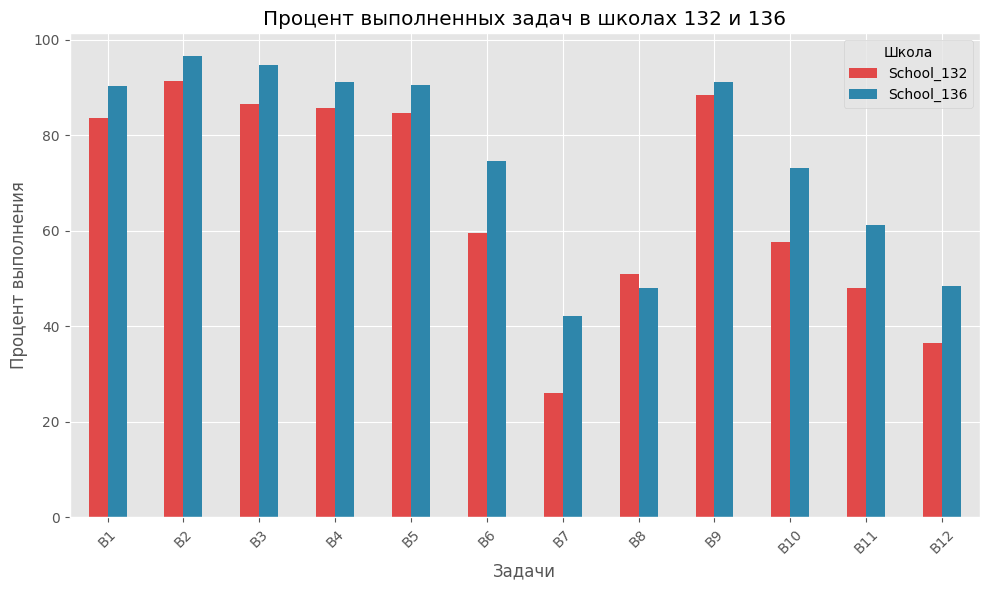

In [39]:
schools = df[(df['№ школы'] == 132) | (df['№ школы'] == 136)]
tasks = list(schools.loc[:, 'B1':'B12'])

percents_136 = [len(df[(df['№ школы'] == 136) & (df[i] == '+')]) / len(df[df['№ школы'] == 136]) * 100 for i in tasks]
percents_132 = [len(df[(df['№ школы'] == 132) & (df[i] == '+')]) / len(df[df['№ школы'] == 132]) * 100 for i in tasks]

new_df = pd.DataFrame(index=tasks, data={'School_132': percents_132, 'School_136': percents_136})

plt.style.use('ggplot')
colors = ['#E14949', '#2E86AB']  # Выберите красивые цвета для столбцов

ax = new_df.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Процент выполненных задач в школах 132 и 136')
plt.xlabel('Задачи')
plt.ylabel('Процент выполнения')
plt.xticks(rotation=45)  # Поворот меток по оси x для улучшения читаемости

plt.legend(title='Школа', loc='upper right')

plt.tight_layout()
plt.show()

ii

In [41]:
import re

<Axes: >

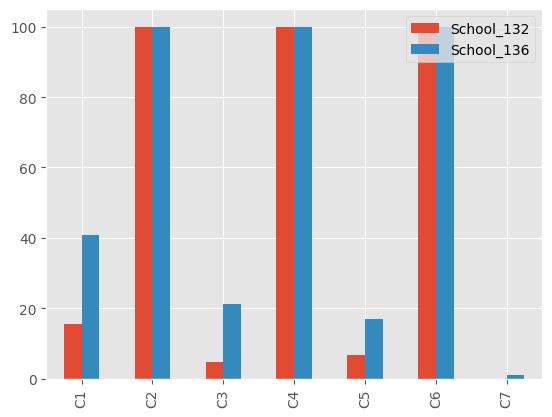

In [48]:
max_score = [round(int(i)/2) for i in re.findall(r'\((\d)\)', df['Задания с развёрнутым ответом'][0])]
tasks = list(schools.loc[:, 'C1':'C7'])
task_score = zip(tasks, max_score)

percents_136 = [len(df[(df['№ школы'] == 136) & (df[task].astype(int) >= max)])/len(df[df['№ школы'] == 136])*100 for task, max in zip(tasks, max_score)]
percents_132 = [len(df[(df['№ школы'] == 132) & (df[task].astype(int) >= max)])/len(df[df['№ школы'] == 132])*100 for task, max in zip(tasks, max_score)]

new_df = pd.DataFrame(index=tasks, data={'School_132': percents_132, 'School_136': percents_136})
new_df.plot.bar()


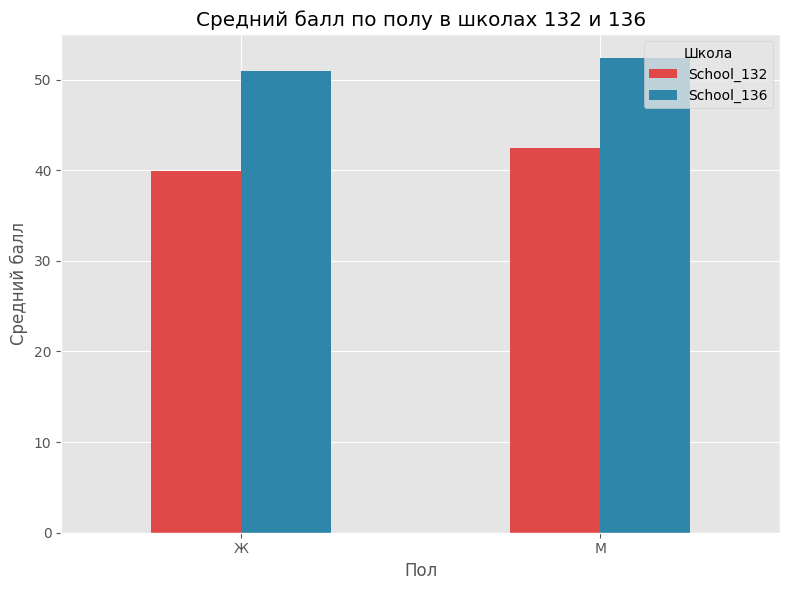

In [47]:
gender = ['Ж', 'М']
mean_136 = [df[(df['Пол'] == i) & (df['№ школы'] == 136)]['Балл'].mean() for i in gender]
mean_132 = [df[(df['Пол'] == i) & (df['№ школы'] == 132)]['Балл'].mean() for i in gender]
new_df = pd.DataFrame(index=gender, data={'School_132': mean_132, 'School_136': mean_136})

plt.style.use('ggplot')
colors = ['#E14949', '#2E86AB']

ax = new_df.plot(kind='bar', color=colors, figsize=(8, 6))
plt.title('Средний балл по полу в школах 132 и 136')
plt.xlabel('Пол')
plt.ylabel('Средний балл')
plt.xticks(rotation=0)


plt.legend(title='Школа', loc='upper right')


plt.tight_layout()
plt.show()